In [1]:
import os
os.chdir('..')

## SEPSIS

In [2]:
import pm4py

real = pm4py.read_xes('plot/sepsis/real_test.xes')

sims_bp = []
for i in range(1,11):
    sims_bp.append(pm4py.read_xes(f'plot/sepsis/sim_bp/sim_base_{i}.xes'))

sims_data = []
for i in range(1,11):
    sims_data.append(pm4py.read_xes(f'plot/sepsis/sim_data/sim_{i}.xes'))

C:\Users\vinci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 315/315 [00:00<00:00, 4464.68it/s]


In [3]:
activities = []

for trace in real:
    for event in trace:
        if event['concept:name'] not in activities:
            activities.append(event['concept:name'])

In [4]:
activities = ['<start>'] + activities + ['<end>']

In [5]:
activities_k = dict(zip(activities, range(len(activities))))

In [6]:
from tqdm import tqdm


def fpActivities(log, activities):
    fpActs = dict()
    for a in tqdm(activities):
        fp_a = {act: [] for act in activities}

        for i in range(len(log)):
            if a == '<start>':
                fp_a[log[i][0]['concept:name']].append(1)
                for j in range(1,len(log[i])):
                    fp_a[log[i][j]['concept:name']].append(0)
                continue
            if a == '<end>':
                continue
            for j in range(len(log[i])):
                if log[i][j]['concept:name'] == a:
                    for act in activities:
                        try:
                            if act == log[i][j+1]['concept:name']:
                                fp_a[act].append(1)
                            else:
                                fp_a[act].append(0)
                        except:
                            fp_a[act].append(0)
                            fp_a['<end>'].append(1)
                    
        fpActs[a] = fp_a
    return fpActs

In [7]:
fp_distr_real = fpActivities(real, activities)

100%|██████████| 18/18 [00:00<00:00, 238.56it/s]


In [8]:
fp_distr_sims_bp = [fpActivities(sim, activities) for sim in sims_bp]

100%|██████████| 18/18 [00:00<00:00, 235.17it/s]


In [9]:
fp_distr_sims_data = [fpActivities(sim, activities) for sim in sims_data]

100%|██████████| 18/18 [00:00<00:00, 228.64it/s]


In [10]:
import numpy as np

def createFP_matrix(fp_distr):
    AvgFp = np.zeros((len(activities), len(activities)))

    for a1 in activities:
        for a2 in activities:
            if fp_distr[a1][a2]:
                AvgFp[activities_k[a1], activities_k[a2]] = np.mean(fp_distr[a1][a2])
            else:
                AvgFp[activities_k[a1], activities_k[a2]] = 0
    
    return AvgFp


In [11]:
AvgFpReal = createFP_matrix(fp_distr_real)
AvgFpSims_bp = np.array([createFP_matrix(fp_distr_sim) for fp_distr_sim in fp_distr_sims_bp])
AvgFpSims_data = np.array([createFP_matrix(fp_distr_sim) for fp_distr_sim in fp_distr_sims_data])

In [12]:
AvgFpSim_bp = AvgFpSims_bp.mean(axis=0)
AvgFpSim_data = AvgFpSims_data.mean(axis=0)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotFP(AvgFp, activities, title=''):
    sns.heatmap(AvgFp, linewidth=0.5, xticklabels=activities, yticklabels=activities, annot=False, fmt='.2f', vmin=0, vmax=1)
    plt.title(title)
    plt.show()   

def plotFP_error(AvgFpReal, AvgFpSim, activities, title=''):
    sns.heatmap(np.abs(AvgFpReal - AvgFpSim), linewidth=0.5, xticklabels=activities, yticklabels=activities, annot=False, fmt='.2f', vmin=0, vmax=1)
    plt.title(title)
    plt.show()

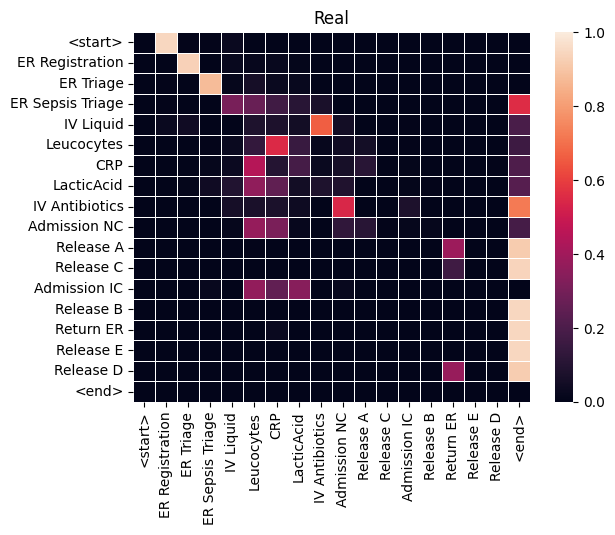

In [14]:
plotFP(AvgFpReal, activities, 'Real')

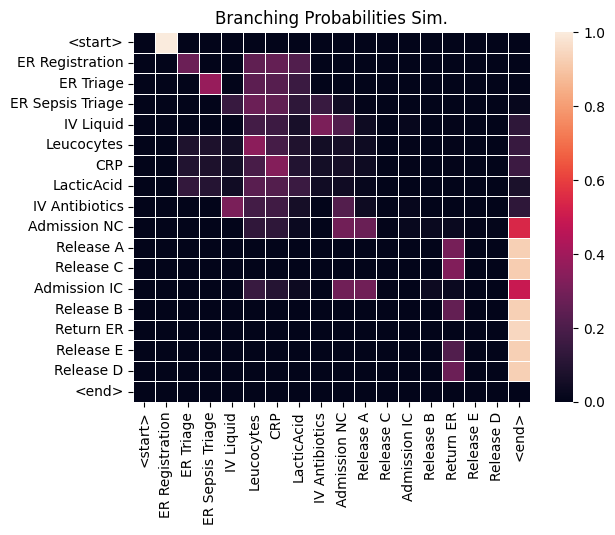

In [15]:
plotFP(AvgFpSim_bp, activities, 'Branching Probabilities Sim.')

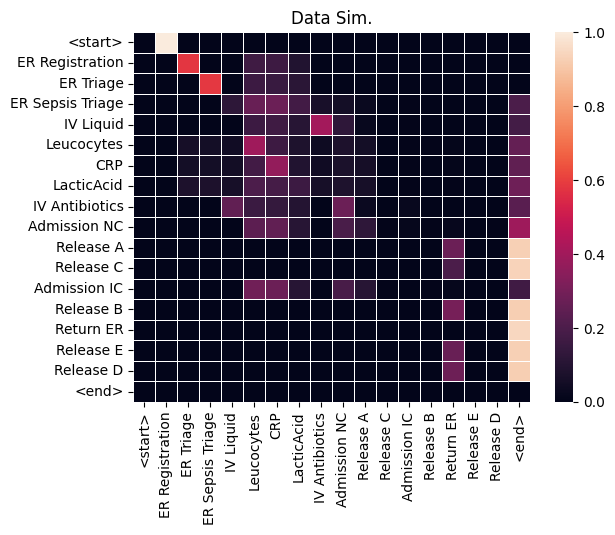

In [16]:
plotFP(AvgFpSim_data, activities, 'Data Sim.')

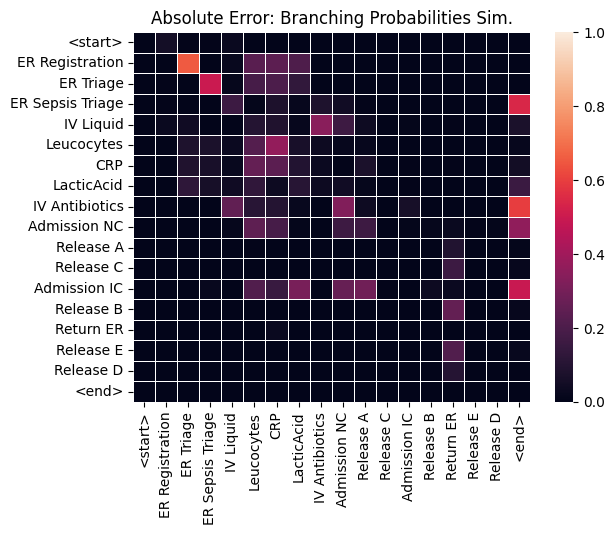

In [17]:
plotFP_error(AvgFpReal, AvgFpSim_bp, activities, 'Absolute Error: Branching Probabilities Sim.')

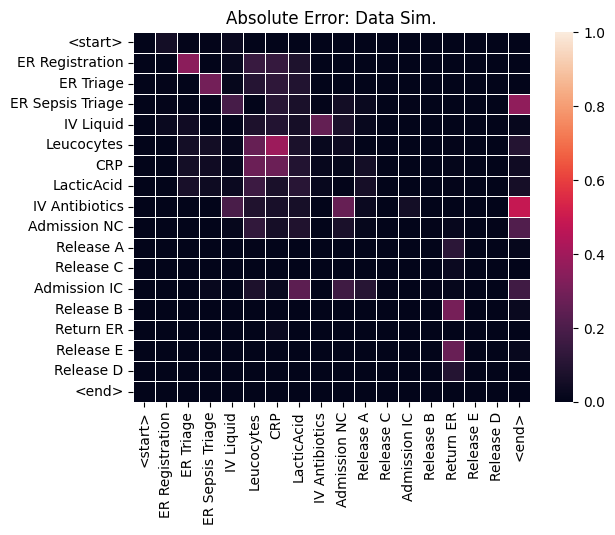

In [18]:
plotFP_error(AvgFpReal, AvgFpSim_data, activities, 'Absolute Error: Data Sim.')

## Road-Traffic Fines

In [19]:
import pm4py

real = pm4py.read_xes('plot/fines/real_test.xes')

sims_bp = []
for i in range(1,11):
    sims_bp.append(pm4py.read_xes(f'plot/fines/sim_bp/sim_base_{i}.xes'))

sims_data = []
for i in range(1,11):
    sims_data.append(pm4py.read_xes(f'plot/fines/sim_hd/sim_{i}.xes'))

parsing log, completed traces :: 100%|██████████| 45111/45111 [00:03<00:00, 14321.58it/s]


In [20]:
activities = []

for trace in real:
    for event in trace:
        if event['concept:name'] not in activities:
            activities.append(event['concept:name'])

In [21]:
activities = ['<start>'] + activities + ['<end>']

In [22]:
activities_k = dict(zip(activities, range(len(activities))))

In [23]:
fp_distr_real = fpActivities(real, activities)

100%|██████████| 13/13 [00:01<00:00,  6.94it/s]


In [24]:
fp_distr_sims_bp = [fpActivities(sim, activities) for sim in sims_bp]

100%|██████████| 13/13 [00:03<00:00,  3.75it/s]


In [25]:
fp_distr_sims_data = [fpActivities(sim, activities) for sim in sims_data]

100%|██████████| 13/13 [00:02<00:00,  5.96it/s]


In [26]:
AvgFpReal = createFP_matrix(fp_distr_real)
AvgFpSims_bp = np.array([createFP_matrix(fp_distr_sim) for fp_distr_sim in fp_distr_sims_bp])
AvgFpSims_data = np.array([createFP_matrix(fp_distr_sim) for fp_distr_sim in fp_distr_sims_data])

In [27]:
AvgFpSim_bp = AvgFpSims_bp.mean(axis=0)
AvgFpSim_data = AvgFpSims_data.mean(axis=0)

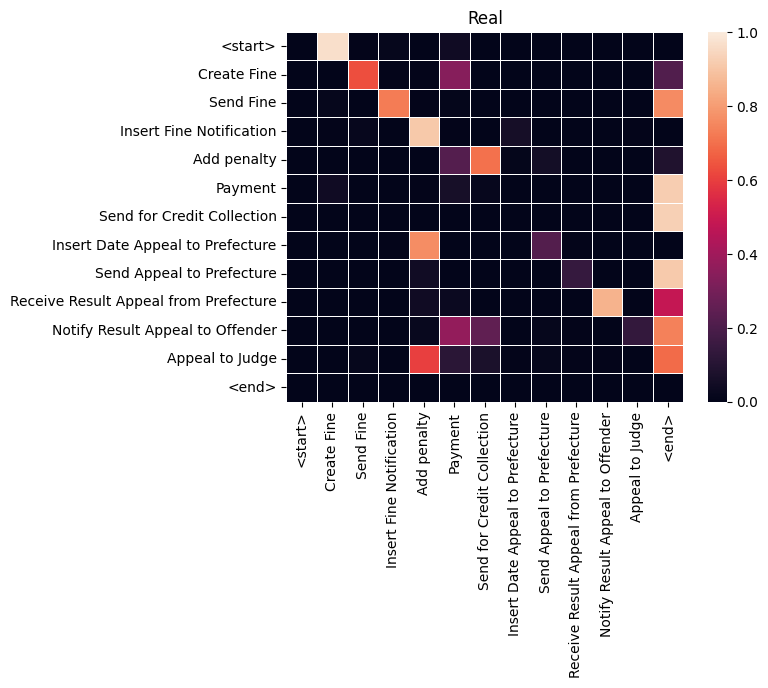

In [28]:
plotFP(AvgFpReal, activities, 'Real')

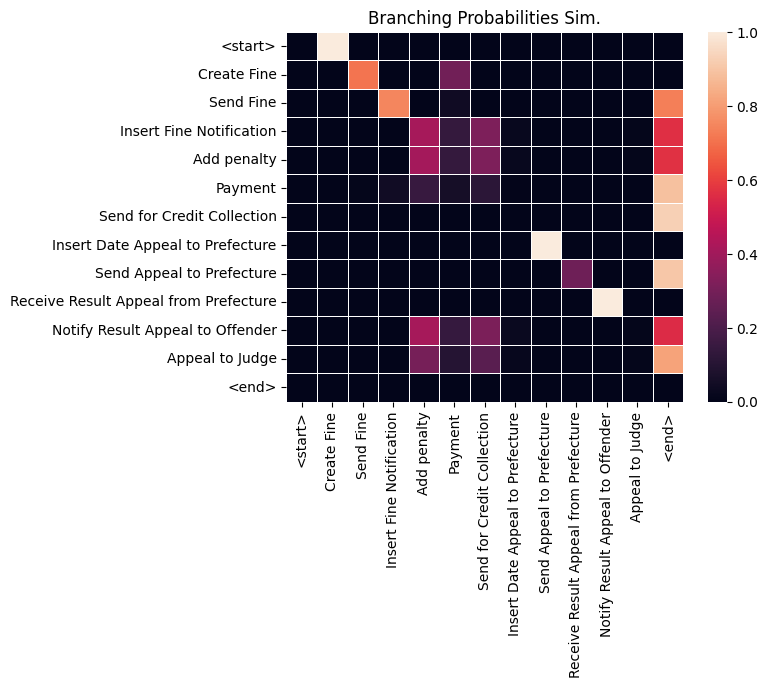

In [29]:
plotFP(AvgFpSim_bp, activities, 'Branching Probabilities Sim.')

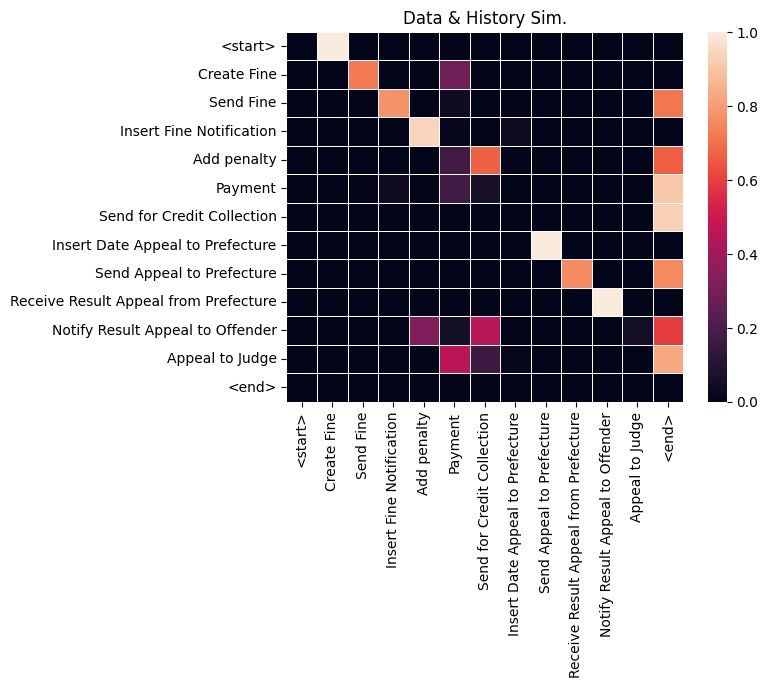

In [30]:
plotFP(AvgFpSim_data, activities, 'Data & History Sim.')

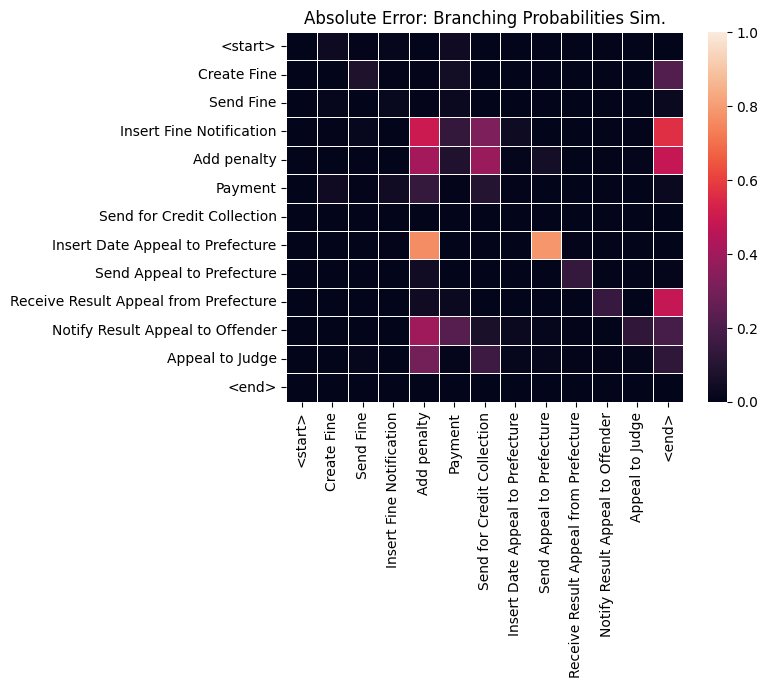

In [31]:
plotFP_error(AvgFpReal, AvgFpSim_bp, activities, 'Absolute Error: Branching Probabilities Sim.')

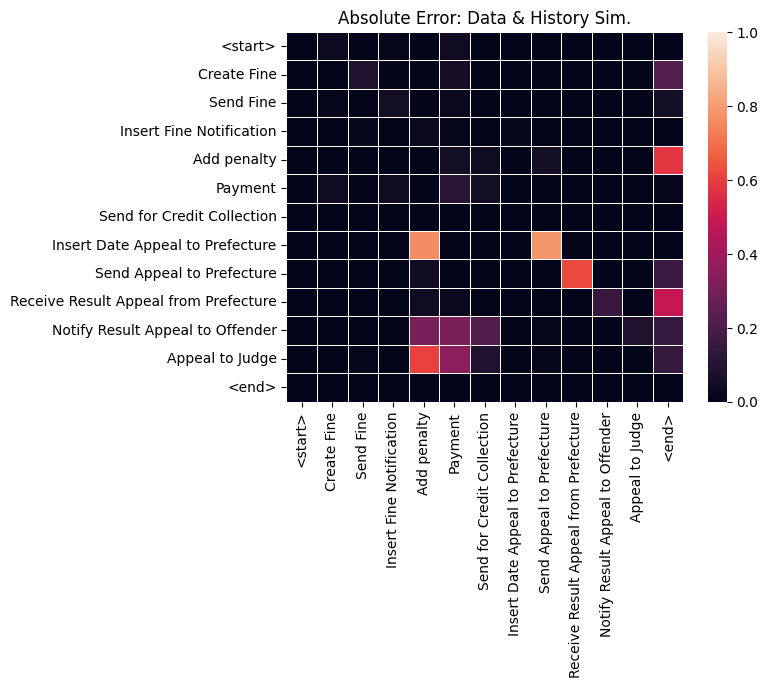

In [32]:
plotFP_error(AvgFpReal, AvgFpSim_data, activities, 'Absolute Error: Data & History Sim.')